In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from AnalyseDefects import AnalyseDefects

In [2]:
def gen_analysis_dict(LL, mode):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05', \
              suffix = "short", priority = -1, LX = LL, Nframes = 181)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_long', \
                suffix = "long", priority = 0, LX = LL, Nframes = 400)
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long',\
                    suffix = "very_long", priority = 3, LX = LL, Nframes = 1500)
    dvery_long2 = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long_v2',\
                    suffix = "very_long2", priority = 2, LX = LL, Nframes = 1500)

    if mode == 'all':
        if LL == 2048:
            defect_list = [dshort, dlong]
        else:
            defect_list = [dshort, dlong, dvery_long, dvery_long2] if LL in [256, 512] else [dshort, dlong, dvery_long]
    else:
        defect_list = [dshort]
    
    return defect_list

In [2]:
LX = [256,]
prefix = "_long"
for L in LX:
    path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{L}_LL0.05{prefix}_sfac'
    if os.path.isdir(path):
        print(L)
        move_files(path)

256


In [3]:
LL = 512
output_path = f'data\\nematic_analysis{LL}_LL0.05'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict(LL, mode)

ad = AnalyseDefects(defect_list, output_path=output_path)


In [ ]:
# Extract, analyze and merge results
#ad.extract_results()
ad.analyze_defects()
#ad.merge_results()

In [ ]:
ad.plot_defects_per_activity(Ndataset=3)

In [30]:
act_idx_bounds=[0,None]
use_merged = True
Npoints_to_fit = 5
Ndataset =1

In [ ]:
fig, ax = ad.plot_density_fluctuation_time_av(Ndataset = 0, \
                                    act_idx_bounds = [4,None], window_idx_bounds = [14, None], use_merged = True, save = True)

window_sizes = ad.window_sizes[0][14:]
min_val = 0.04
ax.plot(window_sizes, (min_val * window_sizes[0] ** 2) / window_sizes ** 2, '--', color='black', alpha=0.7, lw = 1.7)
ax.text(0.03, 0.45, r'$\sim R^{-2}$', fontsize=15, transform=ax.transAxes, verticalalignment='top', fontweight='normal')

ax.plot(window_sizes, 13000/ window_sizes ** 3, '--', color='black', alpha=0.7, lw = 1.7)
ax.text(0.15, 0.95, r'$\sim R^{-3}$', transform=ax.transAxes, fontsize=15, verticalalignment='top', fontweight='normal')

ax.set_ylim(bottom = 5e-4, top = .1)

output_path = f'data\\nematic_analysis{LL}_LL0.05\\merged_results'
#fig.savefig(os.path.join(output_path, f'figs\\dens_fluc_time_av.png'), dpi = 420, pad_inches=0.25)


In [26]:
fitp_dens, statp_dens = ad.analyze_hyperuniformity(Ndataset = Ndataset, fit_densities=True, save = True, \
                    weighted_mean = False, plot = False, use_merged = use_merged,\
                     act_idx_bounds=act_idx_bounds, window_idx_bounds=[30 - Npoints_to_fit, None]);


Non-converged fits (p < 0.05):  2


In [34]:
ad.plot_defects_per_activity(Ndataset=0)

(<Figure size 6720x10080 with 32 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

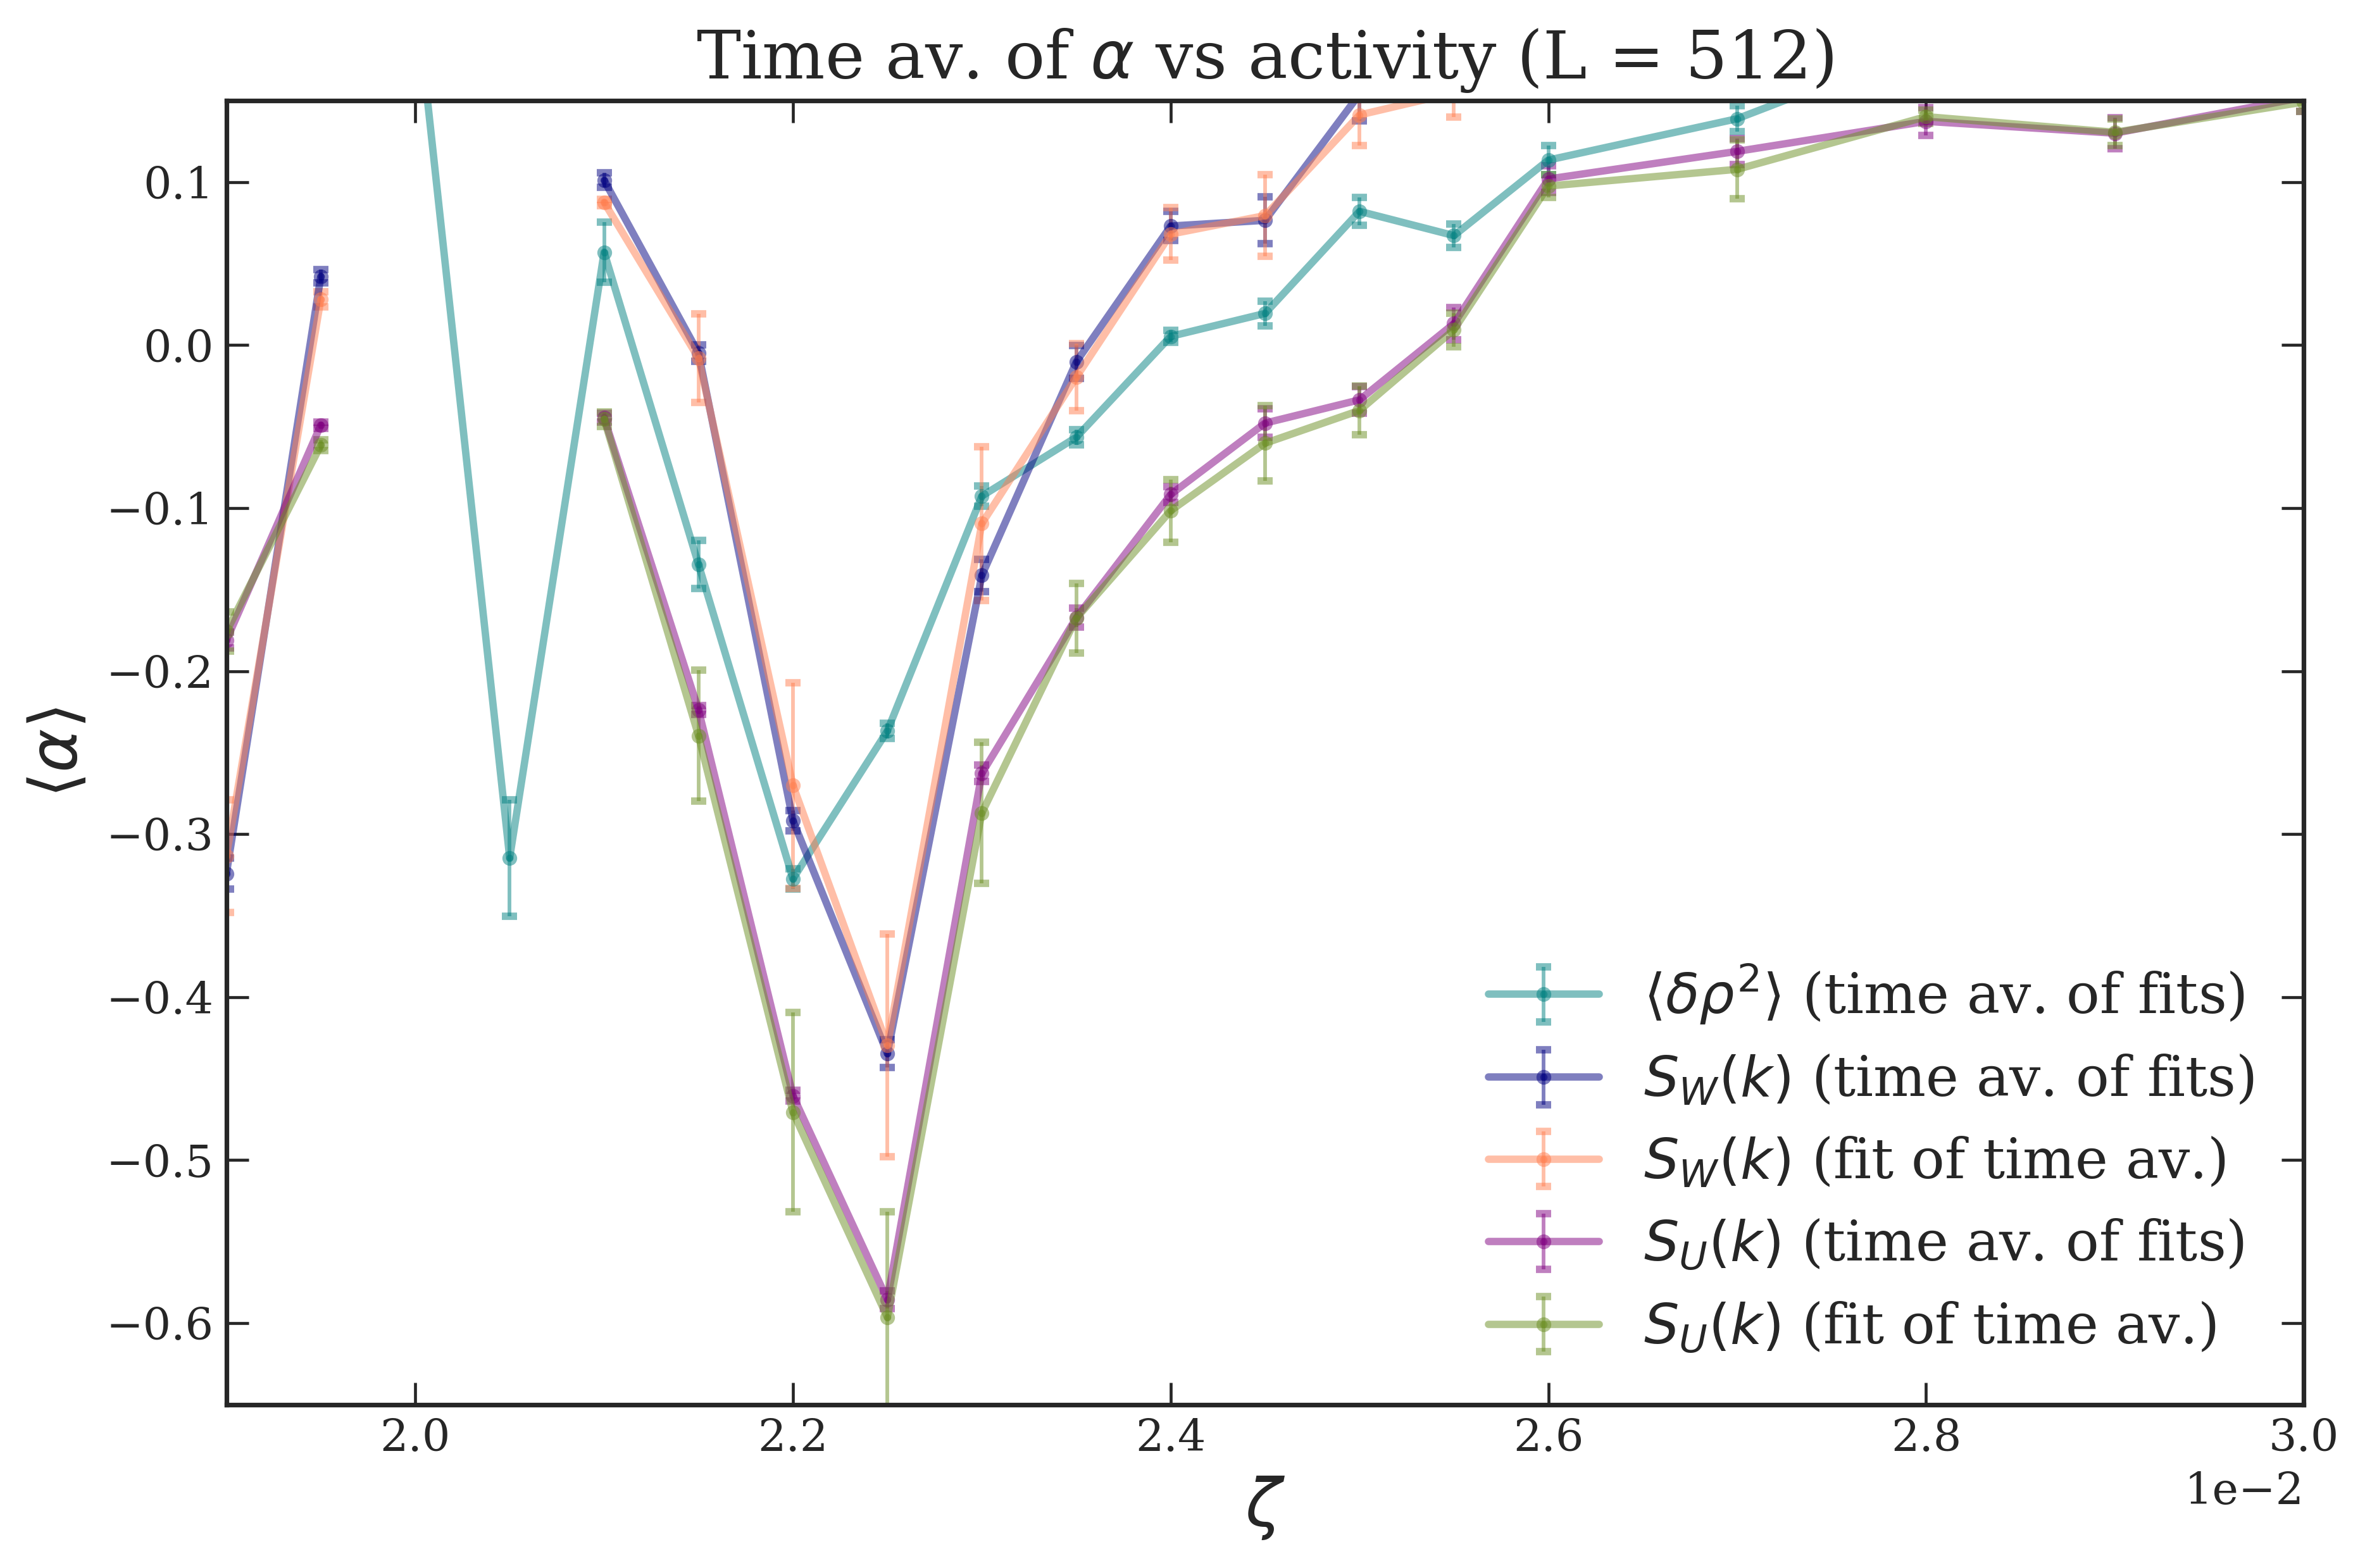

In [31]:
#fig, ax = ad.plot_alpha_mean(Ndataset = 0, include=['fluc', 'sfac_time_av', 'sfac_time_av_unweighted'], use_merged = use_merged, save = True);
fig, ax = ad.plot_alpha_mean(Ndataset = 3, include=['fluc','sfac_all'],\
             use_merged = use_merged, save = True,);
ax.set_ylim(bottom = -.65, top=.15)
ax.set_xlim(left = 0.019, right=.03)
ax.legend(ncol=1, loc = 'lower right')
output_path = f'data\\nematic_analysis{LL}_LL0.05\\merged_results'
fig_name = 'alpha_mean_transition.png'
#fig.savefig(os.path.join(output_path, f'figs\\{fig_name}'), dpi = 420, pad_inches=0.25)


In [29]:
use_merged

False

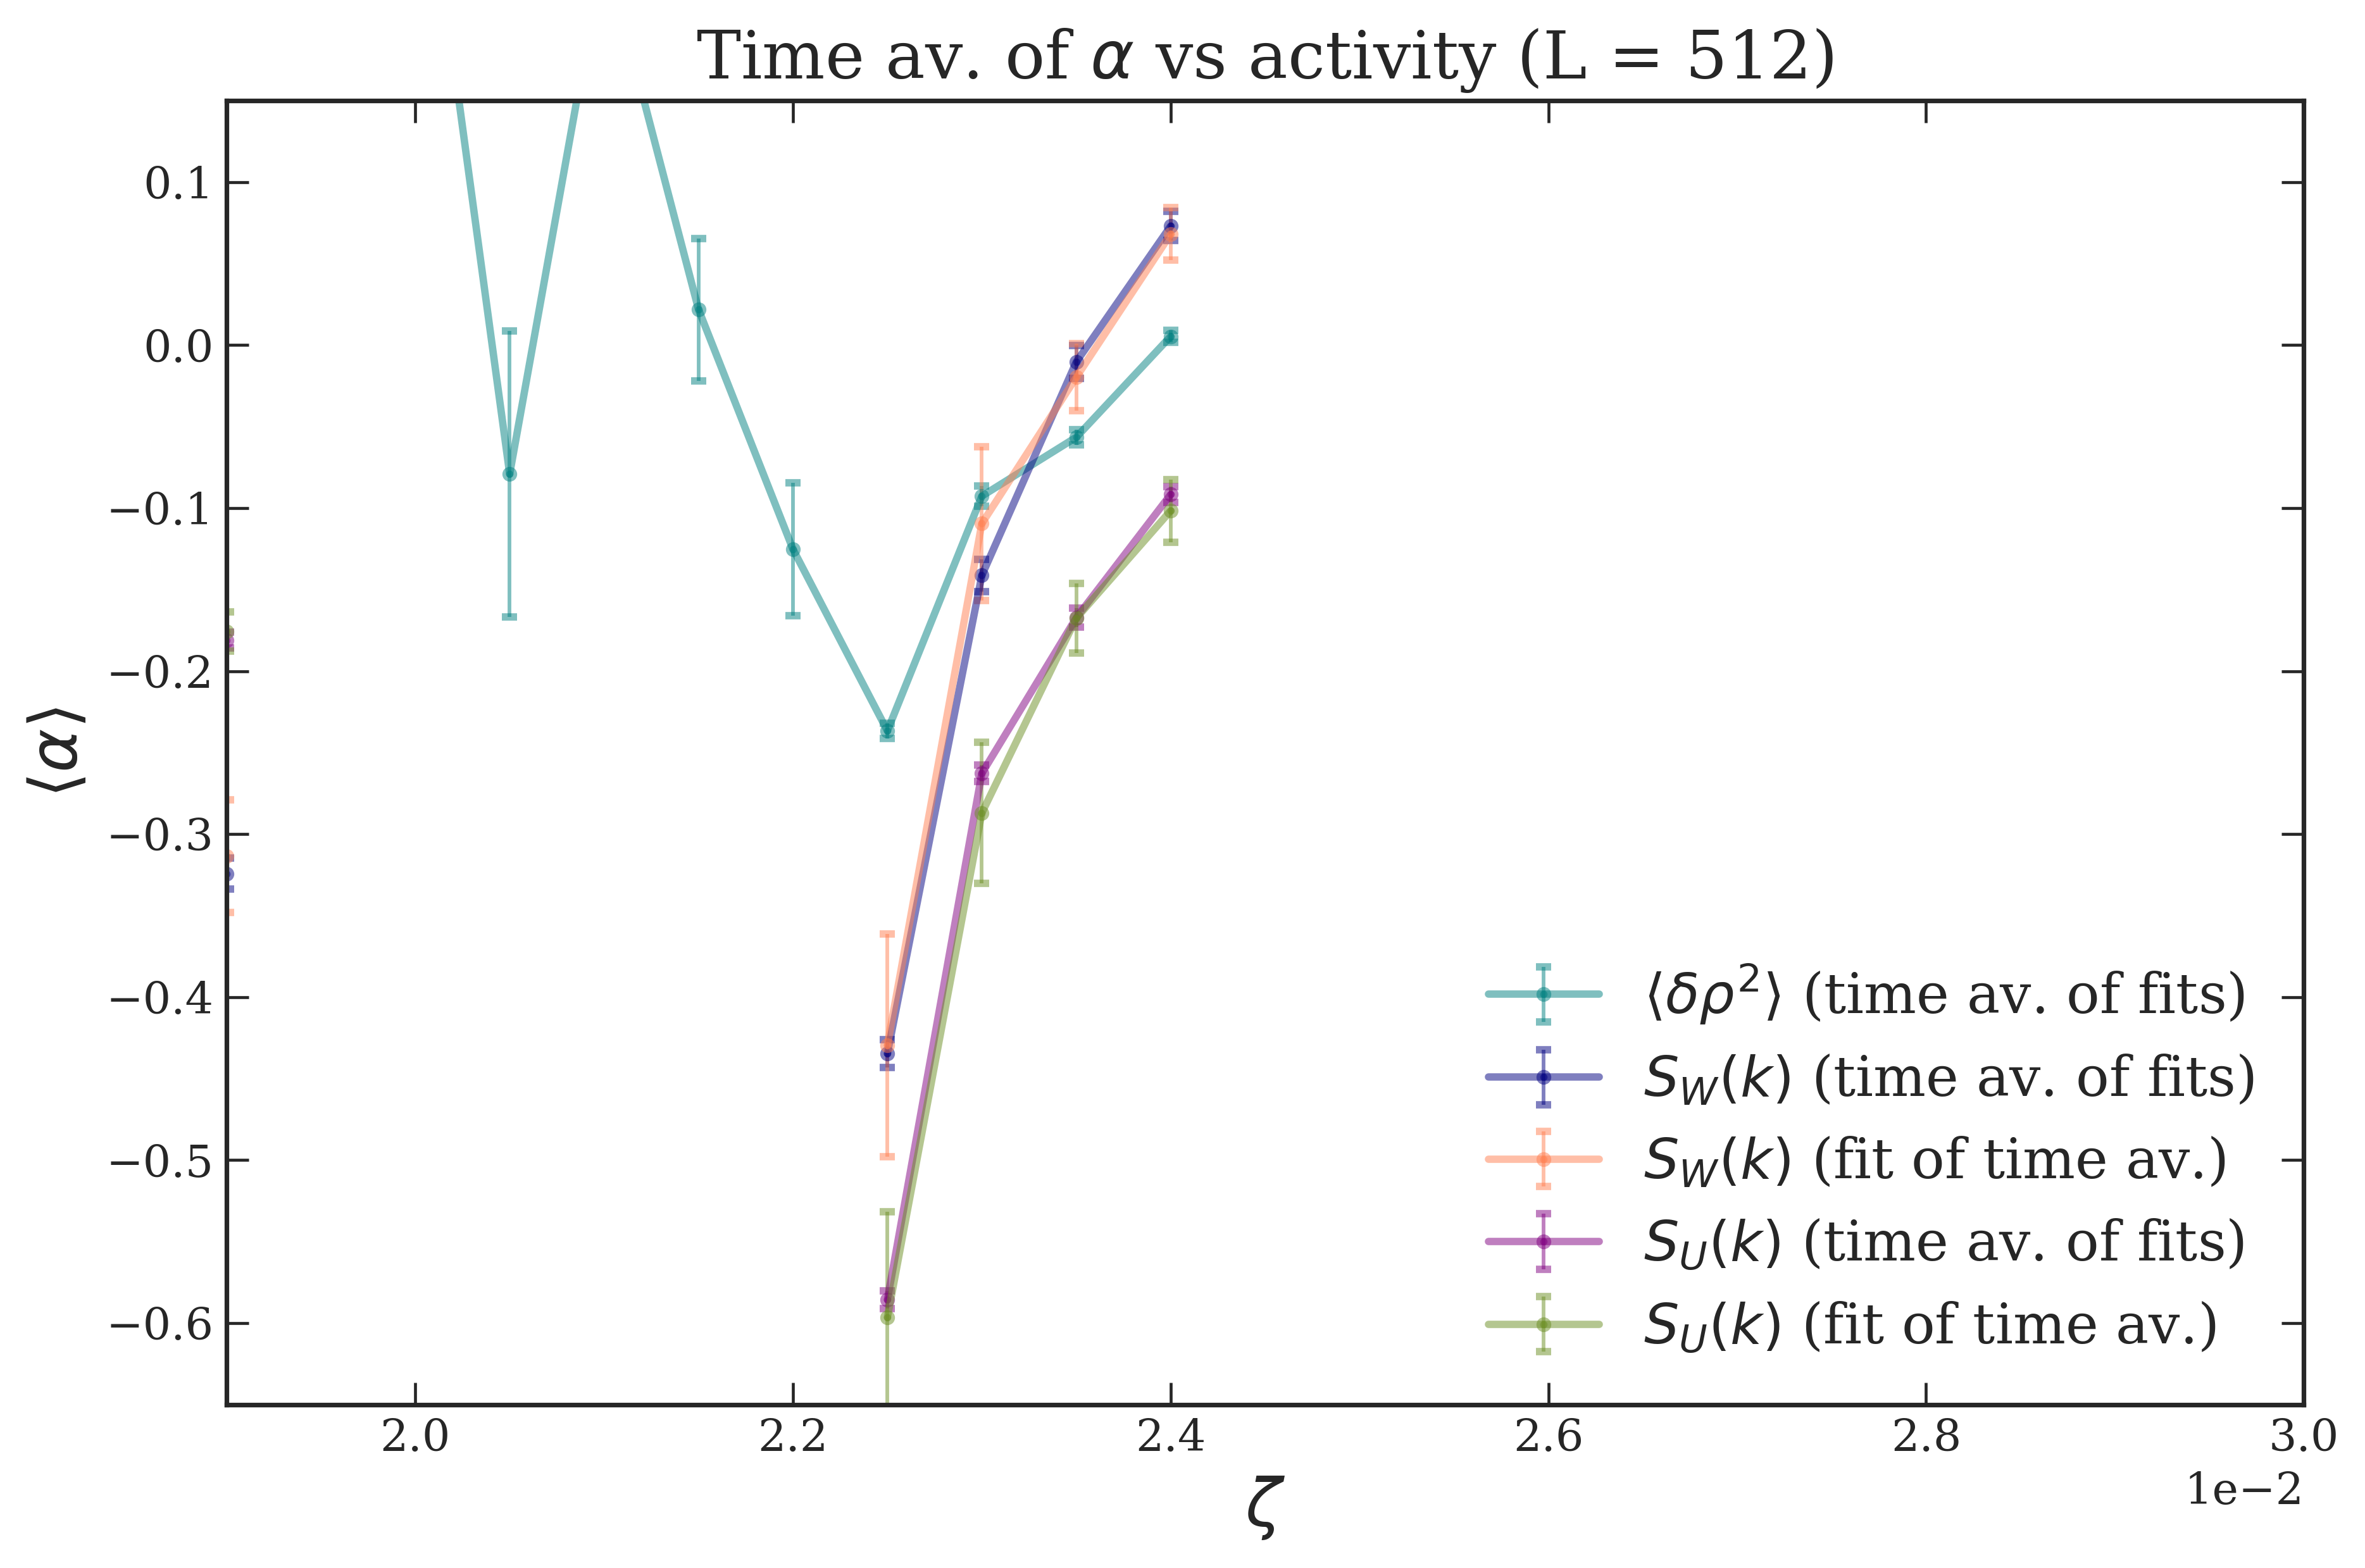

In [28]:
#fig, ax = ad.plot_alpha_mean(Ndataset = 0, include=['fluc', 'sfac_time_av', 'sfac_time_av_unweighted'], use_merged = use_merged, save = True);
fig, ax = ad.plot_alpha_mean(Ndataset = Ndataset, include=['fluc','sfac_all'],\
             use_merged = use_merged, save = True,);
ax.set_ylim(bottom = -.65, top=.15)
ax.set_xlim(left = 0.019, right=.03)
ax.legend(ncol=1, loc = 'lower right')
output_path = f'data\\nematic_analysis{LL}_LL0.05\\merged_results'
fig_name = 'alpha_mean_transition.png'
#fig.savefig(os.path.join(output_path, f'figs\\{fig_name}'), dpi = 420, pad_inches=0.25)


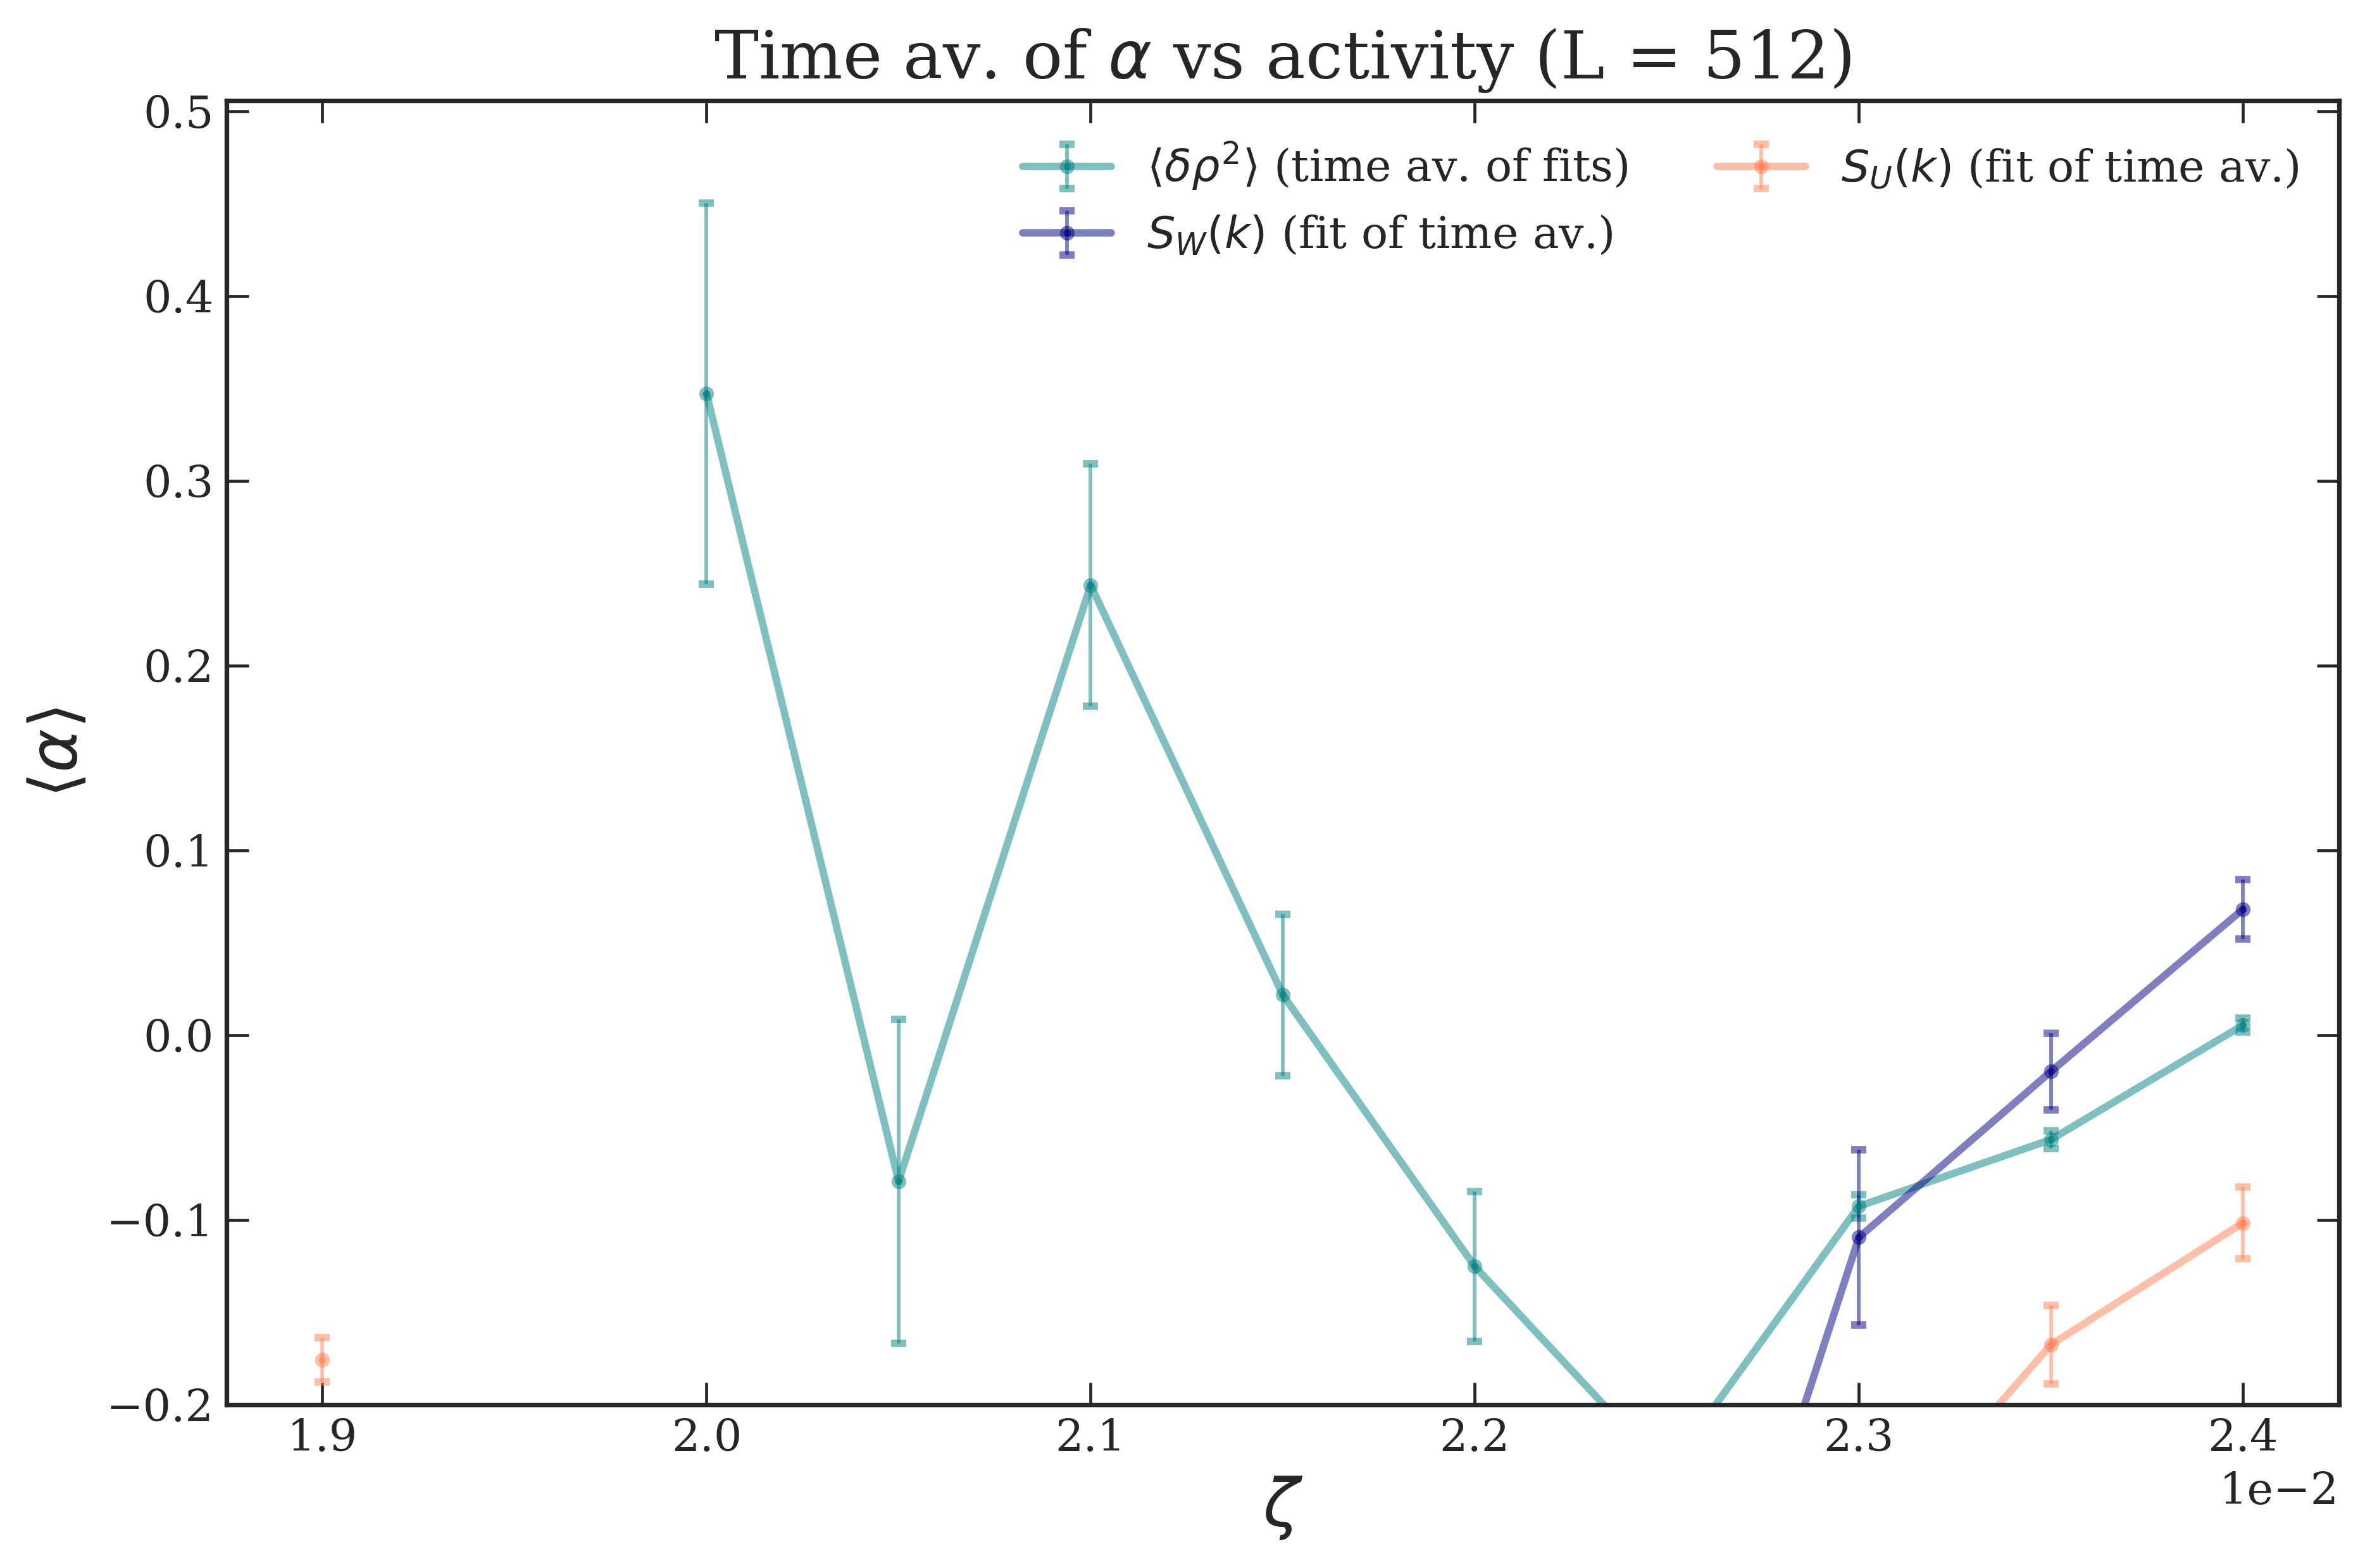

In [27]:
Nbounds = [3,7]

fitp = ad.analyze_sfac_time_av(Ndataset=Ndataset,Npoints_bounds = Nbounds, weighted = False, act_idx_bounds=act_idx_bounds, use_merged = use_merged,save = True, plot = False);
ad.analyze_sfac_time_av(Ndataset=Ndataset,Npoints_bounds = Nbounds, weighted = True, act_idx_bounds=act_idx_bounds, use_merged = use_merged, save = True, plot = False,);
fitpp = ad.analyze_sfac(Ndataset=Ndataset, Npoints_bounds = Nbounds, weighted = True, act_idx_bounds = act_idx_bounds, use_merged = use_merged, save = True, plot = False);
ad.analyze_sfac(Ndataset=Ndataset, Npoints_bounds = Nbounds, weighted = False, act_idx_bounds = act_idx_bounds, use_merged = use_merged, save = True, plot = False);
ad.plot_alpha_mean(Ndataset = Ndataset, include=['fluc', 'sfac_time_av', 'sfac_time_av_unweighted'], use_merged = use_merged, save = True);

Non-converged fits (p < 0.01):  3086
Non-converged fits (p < 0.01):  212


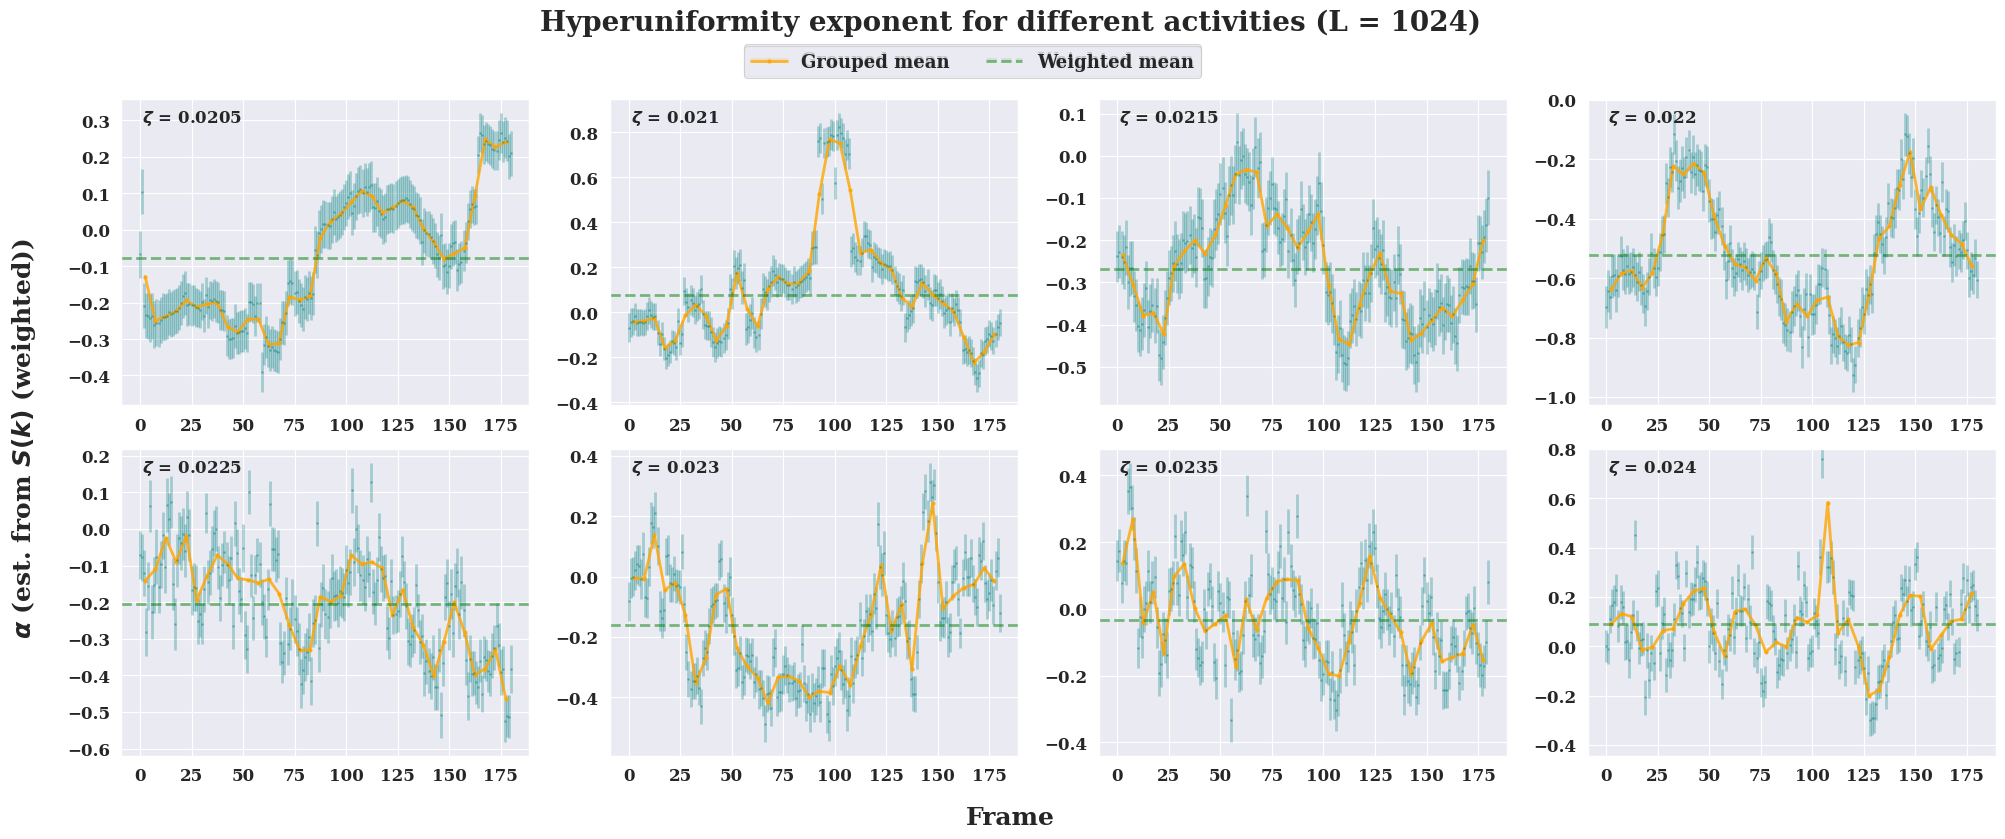

In [262]:
Npoints_to_fit = 5
act_idx_min = 3
fitpp = ad.analyze_sfac(Ndataset=0, Npoints_to_fit = Npoints_to_fit, weighted = True, act_idx_bounds = act_idx_bounds, use_merged = use_merged, save = True, plot = False);
ad.analyze_sfac(Ndataset=0, Npoints_to_fit = Npoints_to_fit, weighted = False, act_idx_bounds = act_idx_bounds, use_merged = use_merged, save = True, plot = False);
fig, ax = ad.plot_hyperuniformity_sfac(act_idx_bounds=[act_idx_min,act_idx_min + 8], use_merged = True, weighted = True, save = True)

output_path = f'data\\nematic_analysis{LL}_LL0.05\\merged_results'
fig_name = 'alpha_sfac.png'
fig.legend(ncol=4, fontsize = 13,bbox_to_anchor=(0.6, 1.00))
fig.supylabel(rf'$\alpha$ (est. from $S(k)$ (weighted))', x = 0.0)
fig.suptitle(f'Hyperuniformity exponent for different activities (L = {LL})', y=1.035)
fig.savefig(os.path.join(output_path, f'figs\\{fig_name}'), dpi = 420, pad_inches=0.1)
ax[-1].set_ylim(top = .8)
plt.show()

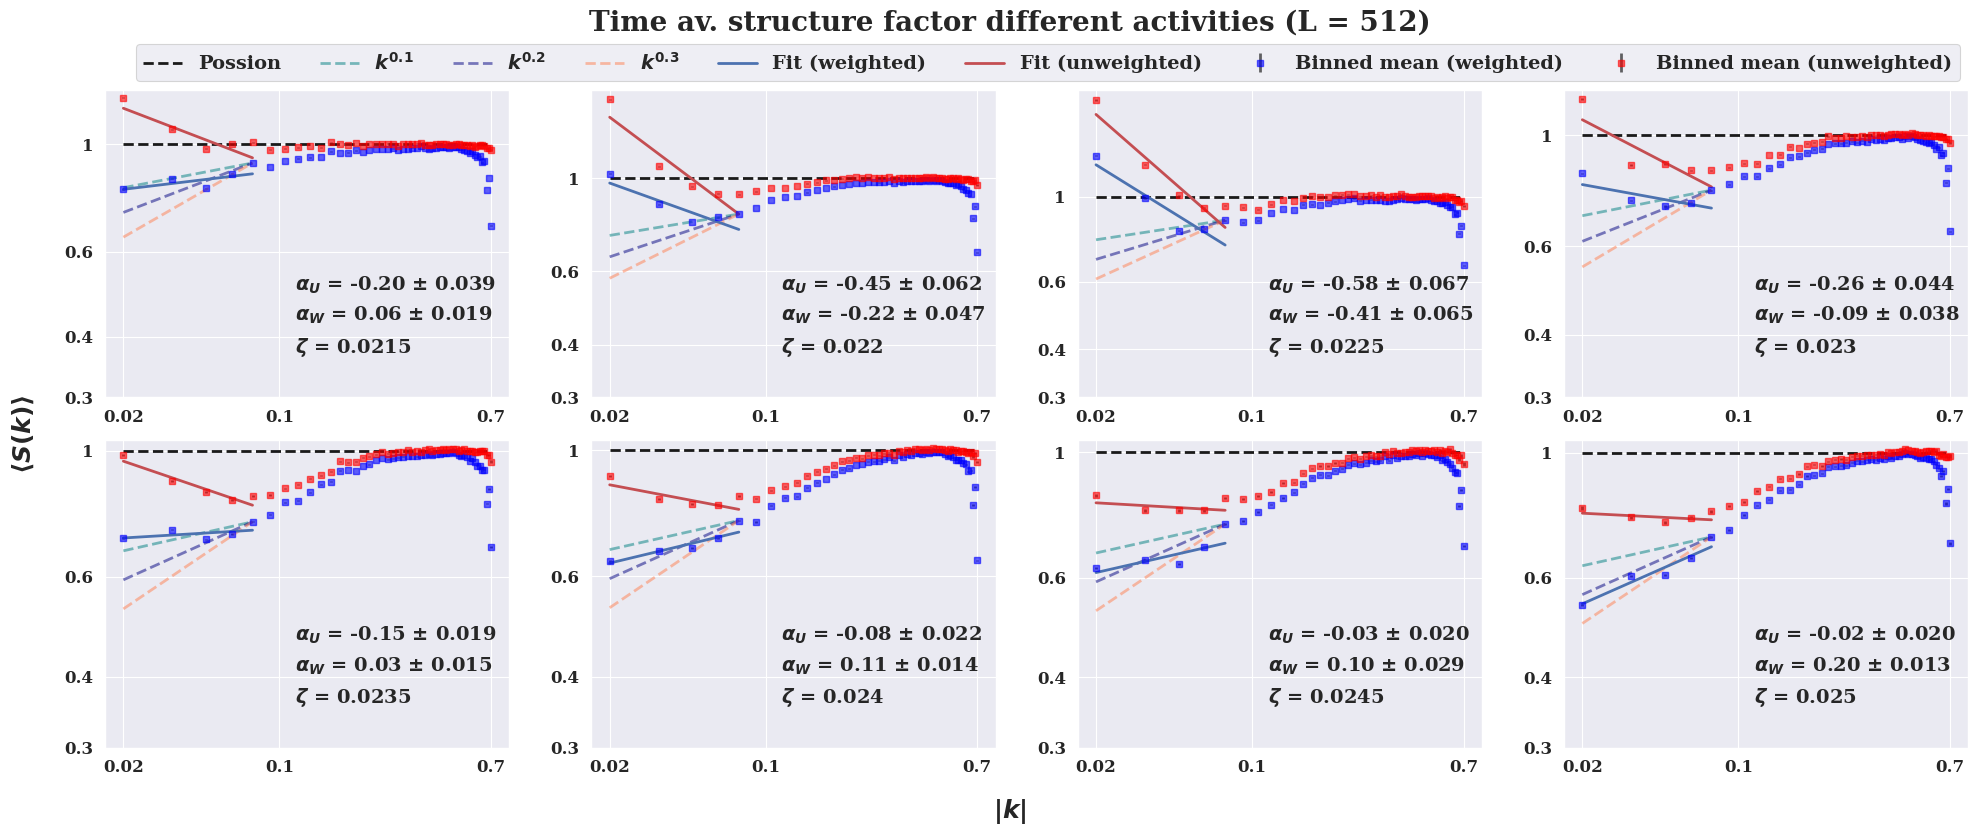

In [18]:
act_idx_min = 6
fig, ax = ad.plot_sfac_weighted_vs_unweighted(Npoints_to_fit=5, act_idx_bounds=[act_idx_min,act_idx_min+8], use_merged=use_merged, save = False)

(0.0, 2.0)

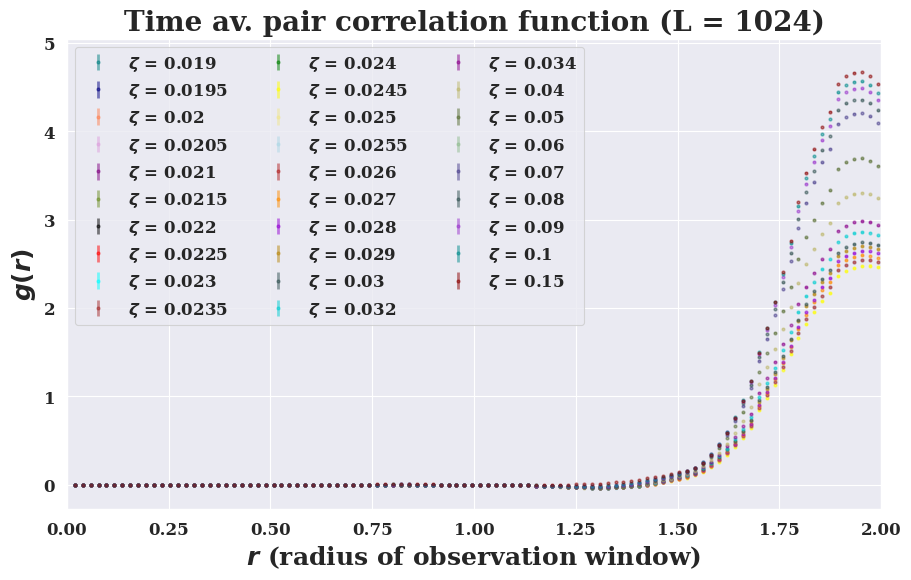

In [7]:
fig, ax = ad.plot_pair_corr_function_time_av(act_idx_bounds=[0,-1], use_merged=use_merged, save = True)
ax.legend(fontsize=12,ncol=3)
output_path = os.path.join(ad.output_main_path, 'merged_results')
#fig.savefig(os.path.join(output_path, f'figs\\pcf.png'), dpi = 420, pad_inches=0.25)
ax.set_xlim(left = 0, right = 2)

No. of windows with max susceptibility at activity 0.022: 22


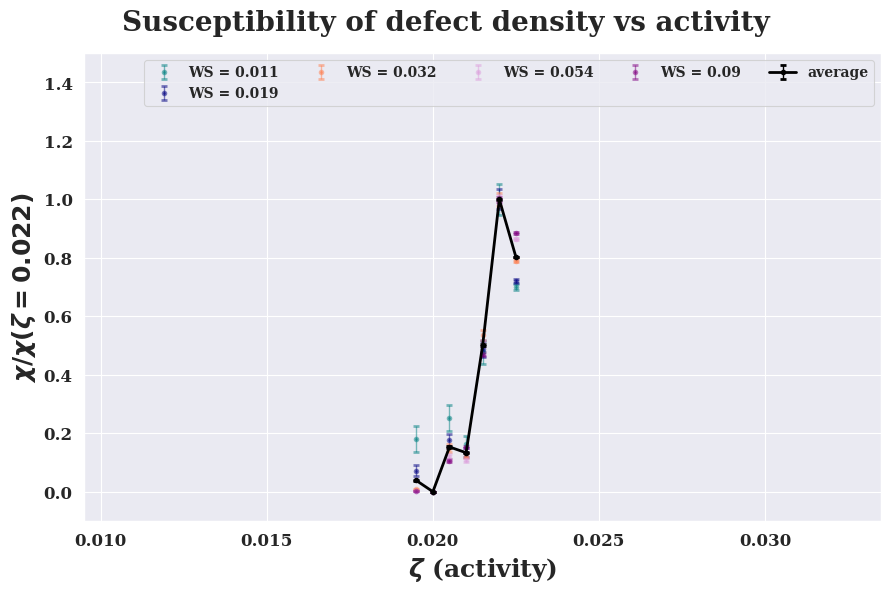

In [39]:
fig, ax = ad.plot_susceptibility(Ndataset=3,Nwindows_jump=5, act_max = 0.022, use_merged=use_merged, act_idx_bounds=[0,None], window_idx_bounds=[8,None])


(<Figure size 900x600 with 1 Axes>,
 <Axes: xlabel=' $\\zeta$ (activity)', ylabel='$U(\\rho)$'>)

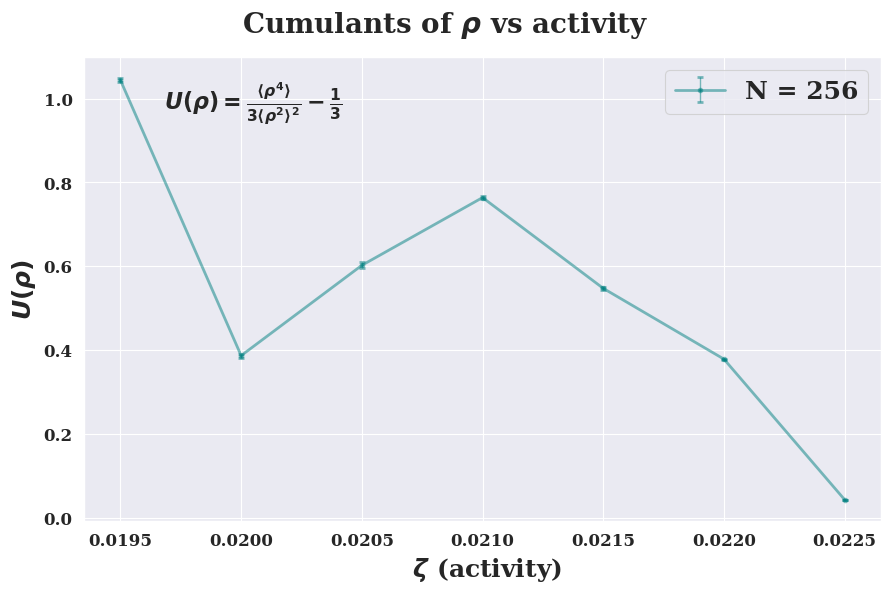

In [41]:
ad.plot_binder_cumulants(Ndataset=3, act_idx_bounds=[0,None], use_merged=use_merged,)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
minn = 0
maxx = None
window_idx_bounds_list=[[minn, maxx], [minn, 20], [minn, 15], [20, maxx], [20, None], [10, maxx], [10, 20], [10, 25], [15,25], [15, maxx]]
for window in window_idx_bounds_list:
    fitp, statp = ad.analyze_hyperuniformity(fit_densities=True, save = False, plot = False, act_bounds=[8,-2], use_merged = True, window_idx_bounds=window);
    ax.plot(ad.act_list[0][8:-2], np.nanmean(fitp[:,:,0], axis = 0), '.-', label = f'{window[0]}:{window[1]}')
ax.set_ylim([-0.3,0.4])
ax.legend()